<img src="../../images/course-banner.png">


In [1]:
import h5py
import numpy as np
import sys

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical



In [3]:
LIB_PATH='C:/Users/Byju/Dropbox/2. Courses/Udemy/DL_II-Transfer_Learning/Section07/dataset-design-notebooks'
sys.path.append(LIB_PATH)
import anis_koubaa_udemy_computer_vision_lib  
from anis_koubaa_udemy_computer_vision_lib import *

# 1. Load Data from HDF5 Dataset File

In [5]:
from pathlib import Path

IMAGE_SIZE=224

In [6]:
#TO CREATE A BALANCED DATASET

DATASET_PATH='C:/Users/Byju/Dropbox/1. BNGPersonal/0. MLDatasets/TLDarchive2/tomato2/All_data/'
H5DATASET_FOLDER='C:/Users/Byju/Dropbox/1. BNGPersonal/0. MLDatasets/TLDarchive2/tomato2/h5-dataset/'

HDF5_DATASET_PATH=H5DATASET_FOLDER+'tomato-disease-type-dataset-SIZE'+str(IMAGE_SIZE)+'.hdf5'
HDF5_TARGET_DATASET_PATH=H5DATASET_FOLDER+'tomato-disease-type-dataset-SIZE'+str(IMAGE_SIZE)+'-train-dev-test-v2.hdf5'

print(HDF5_DATASET_PATH)
print(HDF5_TARGET_DATASET_PATH)

C:/Users/Byju/Dropbox/1. BNGPersonal/0. MLDatasets/TLDarchive2/tomato2/h5-dataset/tomato-disease-type-dataset-SIZE224.hdf5
C:/Users/Byju/Dropbox/1. BNGPersonal/0. MLDatasets/TLDarchive2/tomato2/h5-dataset/tomato-disease-type-dataset-SIZE224-train-dev-test-v2.hdf5


In [7]:
#read dataset
hf = h5py.File(HDF5_DATASET_PATH, "r")

In [8]:
class_label_string_length="S30"

In [9]:
#extract labels
labels_in_ascii = np.array(hf["labels"]).astype(class_label_string_length)
#print (labels)

In [10]:
data = np.array(hf["images"]).astype("f8")

In [11]:
#get labels in string format: decode from ASCII
labels = [n.decode('unicode_escape') for n in labels_in_ascii]
#print(asciiList)
print ('number of labels:',len(labels))

number of labels: 10791


In [12]:
np.unique(labels)

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Leaf_Mold',
       'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spot',
       'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Cu',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U30')

# 2. Select a Uniformly Distributed Dataset

In [13]:
#use this method if you want to select a sample of data uniformly distributed
def select_uniformly_distributed_data_sample(data,labels, class_dict, max_number_of_images=10):
    sample_data=[]
    sample_labels=[]
    for i,image in enumerate(data):
        
        label=labels[i]
        #print(label)
        #print(class_dict[label])
        if (class_dict[label]<max_number_of_images):
            #print(label)
            sample_data.append(image)
            sample_labels.append(label)
            class_dict[label]=class_dict[label]+1
    to_continue=False
    for x,y in class_dict.items():
        if y<max_number_of_images:
            to_continue==True
    #print(to_continue)
    if to_continue==False:
        return np.array(sample_data), np.array(sample_labels),class_dict
    

In [14]:
class_dict = {}
for car_class in np.unique(labels):
    class_dict[car_class]=0
    #print (class_dict)
print(class_dict)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 0, 'Tomato___Late_blight': 0, 'Tomato___Leaf_Mold': 0, 'Tomato___Septoria_leaf_spot': 0, 'Tomato___Spider_mites Two-spot': 0, 'Tomato___Target_Spot': 0, 'Tomato___Tomato_Yellow_Leaf_Cu': 0, 'Tomato___Tomato_mosaic_virus': 0, 'Tomato___healthy': 0}


In [15]:

#sample_data, sample_labels,class_dict=select_uniformly_distributed_data_sample(data,labels,class_dict, max_number_of_images=80)

In [16]:
#use this method if you want to use the whole dataset as is without balancing the classes
sample_data, sample_labels,class_dict = data,np.array(labels),class_dict


In [17]:
print(sample_data.shape)
print(sample_labels.shape)
print(class_dict)

(10791, 224, 224, 3)
(10791,)
{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 0, 'Tomato___Late_blight': 0, 'Tomato___Leaf_Mold': 0, 'Tomato___Septoria_leaf_spot': 0, 'Tomato___Spider_mites Two-spot': 0, 'Tomato___Target_Spot': 0, 'Tomato___Tomato_Yellow_Leaf_Cu': 0, 'Tomato___Tomato_mosaic_virus': 0, 'Tomato___healthy': 0}


# 3. Display the Dataset

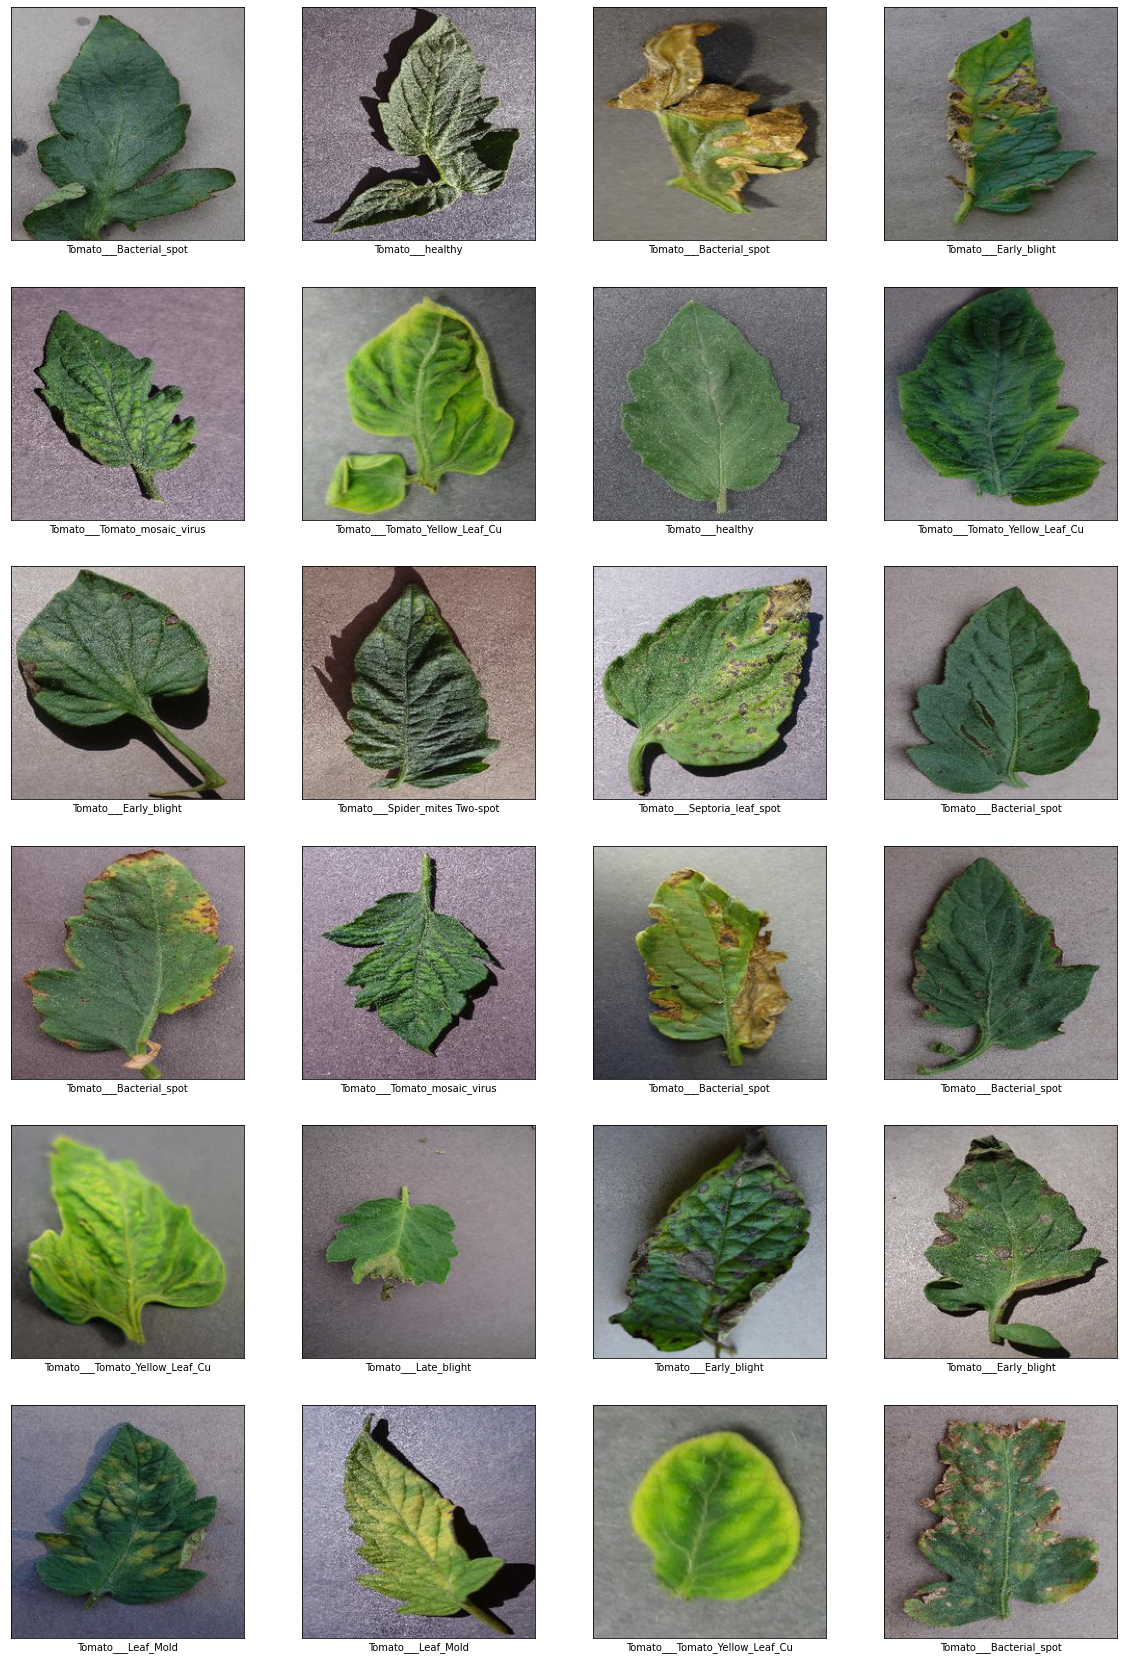

In [18]:
anis_koubaa_udemy_computer_vision_lib.plot_sample_from_dataset(sample_data, sample_labels,rows=6, colums=4, width=20,height=30)

# 4. Split Data into Train and Test

### Divide the whole dataset into Train/Test

In [19]:
test_split_ratio=0.2
(trainX, testX, trainLabels, testLabels) = train_test_split(sample_data, sample_labels,test_size=test_split_ratio, stratify=sample_labels, random_state=42)

# perform one-hot encoding on the labels
print ("sample of train labels: ", trainLabels[:4])
lb = LabelBinarizer()
train_binary_labels = lb.fit_transform(trainLabels)
print ("sample of train_binary_labels after Binarizer: \n", train_binary_labels[:4])


print ("sample of test labels: ", testLabels[:4])
test_binary_labels = lb.fit_transform(testLabels)
print ("sample of test_binary_labels after Binarizer: \n", test_binary_labels[:4])

trainY=train_binary_labels
testY=test_binary_labels

print("trainX.shape: ",trainX.shape)
print("trainY.shape: ",trainY.shape)
print("testX.shape: ",testX.shape)
print("testY.shape: ",testY.shape)



sample of train labels:  ['Tomato___Late_blight' 'Tomato___Tomato_Yellow_Leaf_Cu'
 'Tomato___healthy' 'Tomato___Bacterial_spot']
sample of train_binary_labels after Binarizer: 
 [[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]
sample of test labels:  ['Tomato___Target_Spot' 'Tomato___Early_blight'
 'Tomato___Tomato_mosaic_virus' 'Tomato___Bacterial_spot']
sample of test_binary_labels after Binarizer: 
 [[0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0]]
trainX.shape:  (8632, 224, 224, 3)
trainY.shape:  (8632, 10)
testX.shape:  (2159, 224, 224, 3)
testY.shape:  (2159, 10)


In [20]:
print(lb.classes_)

['Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spot' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Cu' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']


### Divide the Test Dataset into Dev/Test

In [21]:
#print("testX.shape: ",testX.shape)
#print("testLabels.shape: ",np.array(testLabels).shape)

dev_test_ratio=0.5
(devX, testX, devLabels, testLabels) = train_test_split(testX, testLabels,test_size=dev_test_ratio, stratify=testLabels, random_state=42)

# perform one-hot encoding on the labels
print ("sample of dev labels: ", devLabels[:4])
lb = LabelBinarizer()
train_binary_labels = lb.fit_transform(devLabels)
print ("sample of dev_binary_labels after Binarizer: \n", train_binary_labels[:4])


print ("sample of test labels: ", testLabels[:4])
test_binary_labels = lb.fit_transform(testLabels)
print ("sample of test_binary_labels after Binarizer: \n", test_binary_labels[:4])

devY=train_binary_labels
testY=test_binary_labels

print("devX.shape: ",devX.shape)
print("devY.shape: ",devY.shape)
print("testX.shape: ",testX.shape)
print("testY.shape: ",testY.shape)

sample of dev labels:  ['Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Septoria_leaf_spot' 'Tomato___Spider_mites Two-spot']
sample of dev_binary_labels after Binarizer: 
 [[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
sample of test labels:  ['Tomato___healthy' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Septoria_leaf_spot']
sample of test_binary_labels after Binarizer: 
 [[0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
devX.shape:  (1079, 224, 224, 3)
devY.shape:  (1079, 10)
testX.shape:  (1080, 224, 224, 3)
testY.shape:  (1080, 10)


# 5. Create the HDF5 Balanced Dataset

In [24]:
import h5py
hf=h5py.File(HDF5_TARGET_DATASET_PATH, 'w')



OSError: Unable to create file (unable to truncate a file which is already open)

In [23]:
hf.create_dataset("trainX",
                  shape=trainX.shape,
                  maxshape=trainX.shape,
                  compression="gzip",
                  compression_opts=9,
                  data=trainX)

<HDF5 dataset "trainX": shape (8632, 224, 224, 3), type "<f8">

In [25]:
hf.create_dataset("trainY",
                  shape=trainY.shape,
                  maxshape=trainY.shape,
                  compression="gzip",
                  compression_opts=9,
                  data=trainY)

<HDF5 dataset "trainY": shape (8632, 10), type "<i4">

In [26]:
hf.create_dataset("devX",
                  shape=devX.shape,
                  maxshape=devX.shape,
                  compression="gzip",
                  compression_opts=9,
                  data=devX)

<HDF5 dataset "devX": shape (1079, 224, 224, 3), type "<f8">

In [27]:
hf.create_dataset("devY",
                  shape=devY.shape,
                  maxshape=devY.shape,
                  compression="gzip",
                  compression_opts=9,
                  data=devY)

<HDF5 dataset "devY": shape (1079, 10), type "<i4">

In [28]:
hf.create_dataset("testX",
                  shape=testX.shape,
                  maxshape=testX.shape,
                  compression="gzip",
                  compression_opts=9,
                  data=testX)

<HDF5 dataset "testX": shape (1080, 224, 224, 3), type "<f8">

In [29]:
hf.create_dataset("testY",
                  shape=testY.shape,
                  maxshape=testY.shape,
                  compression="gzip",
                  compression_opts=9,
                  data=testY)

<HDF5 dataset "testY": shape (1080, 10), type "<i4">

In [30]:
train_labels_ascii= [n.encode('unicode_escape') for n in trainLabels]
dev_labels_ascii= [n.encode('unicode_escape') for n in devLabels]
test_labels_ascii= [n.encode('unicode_escape') for n in testLabels]

#print(train_labels_ascii)


In [31]:
hf.create_dataset("trainLabels",
            shape=np.array(trainLabels).shape,
            compression="gzip",
            compression_opts=9,
            data=train_labels_ascii,dtype=class_label_string_length
            )

<HDF5 dataset "trainLabels": shape (8632,), type "|S30">

In [32]:
hf.create_dataset("devLabels",
            shape=np.array(devLabels).shape,
            compression="gzip",
            compression_opts=9,
            data=dev_labels_ascii,dtype=class_label_string_length
            )

<HDF5 dataset "devLabels": shape (1079,), type "|S30">

In [33]:
hf.create_dataset("testLabels",
            shape=np.array(testLabels).shape,
            compression="gzip",
            compression_opts=9,
            data=test_labels_ascii,dtype=class_label_string_length
            )

<HDF5 dataset "testLabels": shape (1080,), type "|S30">

In [34]:
hf.close()